In [1]:
import numpy as np
import tensorflow as tf

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('Images')

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

['Type1Haks', 'Type1Pla', 'Type1Range', 'Type1Screw', 'Type1Test', 'Type2Haks', 'Type2Range', 'Type2Screw', 'Type2Test']
Types of classes labels found:  9


In [2]:
!pip install gradio

In [3]:
import gradio as gr

In [4]:
import PIL
from tensorflow.keras import layers
from keras.layers.core import Dense
from keras.layers.core import Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [5]:
import pathlib

data_dir = tf.keras.utils.get_file('Images', origin=dataset_path, untar=True)

data_dir = pathlib.Path(data_dir)

In [6]:
print(data_dir)

C:\Users\barna\.keras\datasets\Images


In [7]:
!pip install pillow

In [8]:
from PIL import Image

C:\Users\barna\.keras\datasets\Images\Type1Haks\haks1.jpg


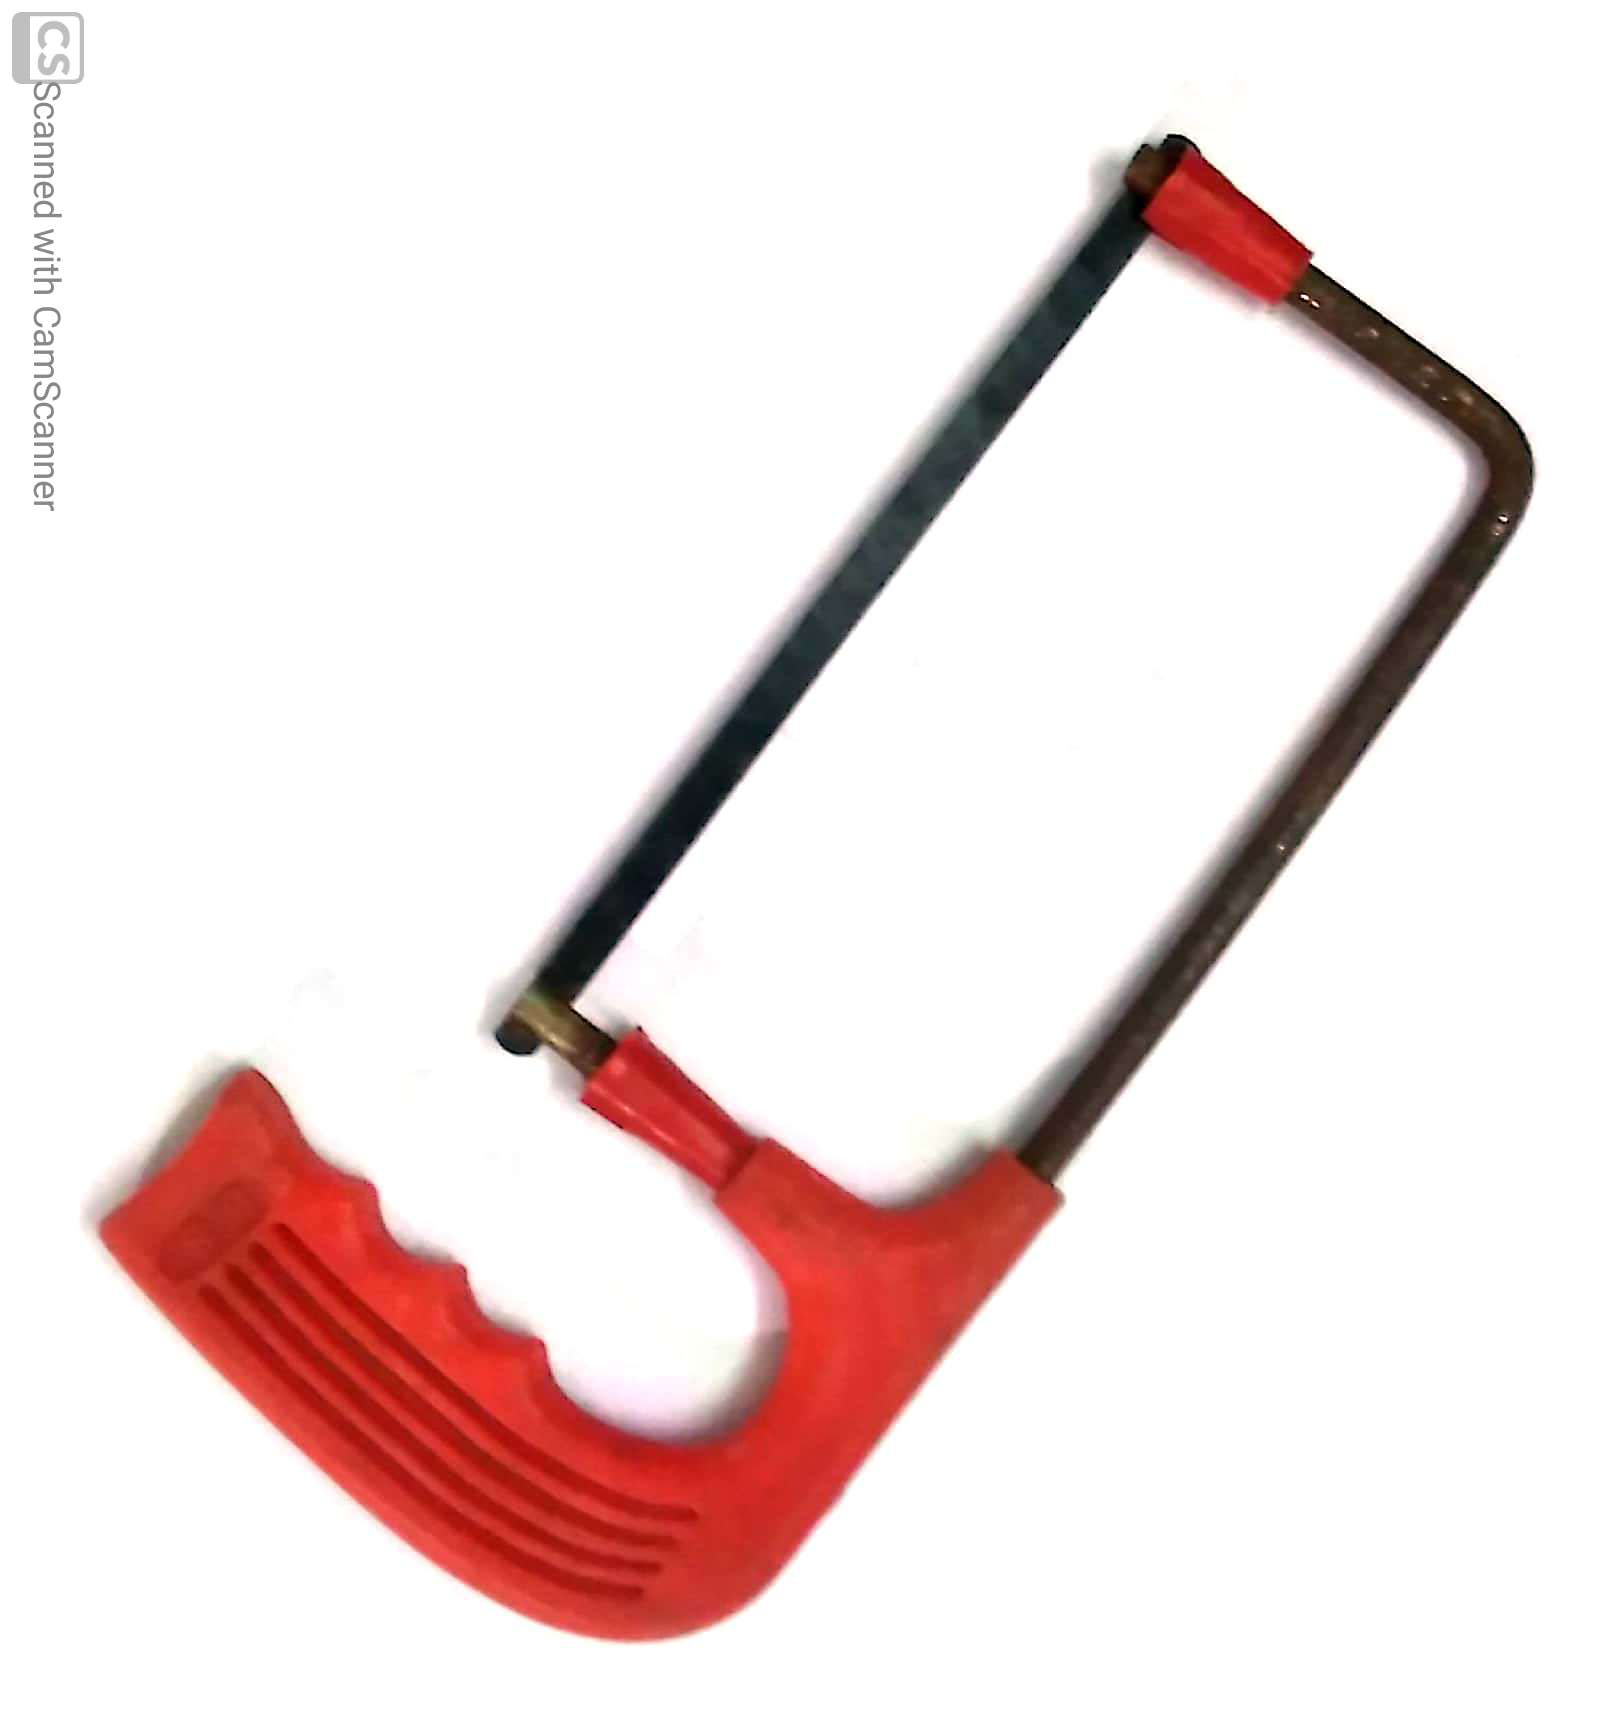

In [9]:
Type1Haks = list(data_dir.glob('Type1Haks/*'))
print(Type1Haks[0])
Image.open(str(Type1Haks[0]))

In [10]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2440 files belonging to 9 classes.
Using 1952 files for training.


In [11]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2440 files belonging to 9 classes.
Using 488 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names)

['Type1Haks', 'Type1Pla', 'Type1Range', 'Type1Screw', 'Type1Test', 'Type2Haks', 'Type2Range', 'Type2Screw', 'Type2Test']


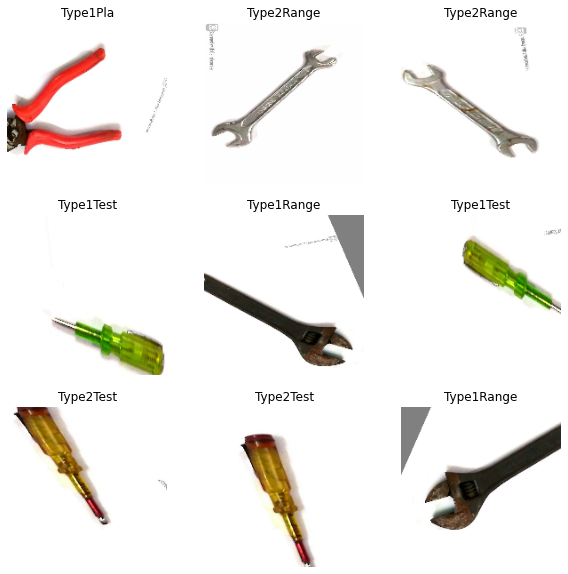

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [14]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=9,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(9, activation='softmax'))

In [15]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 4617      
Total params: 24,641,417
Trainable params: 1,053,705
Non-trainable params: 23,587,712
_________________________________________________________________


In [16]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
61/61 [==============================] - 91s 1s/step - loss: 0.1831 - accuracy: 0.9498 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 2/10
61/61 [==============================] - 89s 1s/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.0071 - val_accuracy: 0.9980
Epoch 3/10
61/61 [==============================] - 85s 1s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 5.0136e-04 - val_accuracy: 1.0000
Epoch 4/10
61/61 [==============================] - 89s 1s/step - loss: 4.6181e-04 - accuracy: 1.0000 - val_loss: 2.5126e-04 - val_accuracy: 1.0000
Epoch 5/10
61/61 [==============================] - 84s 1s/step - loss: 2.6711e-04 - accuracy: 1.0000 - val_loss: 2.2407e-04 - val_accuracy: 1.0000
Epoch 6/10
61/61 [==============================] - 86s 1s/step - loss: 2.0943e-04 - accuracy: 1.0000 - val_loss: 1.7298e-04 - val_accuracy: 1.0000
Epoch 7/10
61/61 [==============================] - 84s 1s/step - loss: 1.6017e-04 - accuracy: 1.0000 - val_loss: 1.5013e-04 - val_a

In [18]:
def predict_image(img):
  img_4d=img.reshape(-1,180,180,3)
  prediction=resnet_model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(9)}

In [ ]:
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=9)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

C:\Users\barna\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\barna\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860/

To create a public link, set `share=True` in `launch()`.
